# Shearing
This notebook demonstrates how to apply shearing to 3D images. The clesperanto API supports sharing along a given axis in defined planes. The plane-terminology follows the [Z,Y,X]-philosophy: The following MRI image has 120 planes along Z and is 160x160 pixels high/wide in Y and X.

In [1]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imshow, imread


In [3]:
# Laod example data
input_image = imread("../../data/Haase_MRT_tfl3d1.tif")
input_image.shape

(120, 160, 160)

## The Z-plane
We draw a maximum-intensity projection along Z first to clarify names of dimensions. This is a projection of the XY-plane, also known as the Z-plane. In this plane, X goes from left to right and Y goes from top to bottom.

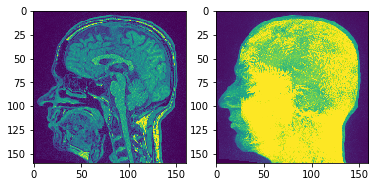

In [4]:
fig, (ax1,ax2) = plt.subplots(1, 2)

cle.imshow(input_image[60], plot=ax1)
cle.imshow(cle.maximum_z_projection(input_image), plot=ax2)

## Shearing towards Y in the Z-plane
In that particular plane, we can now shear along Y by specifying angles.

Angle:  60


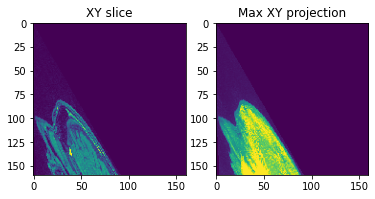

Angle:  45


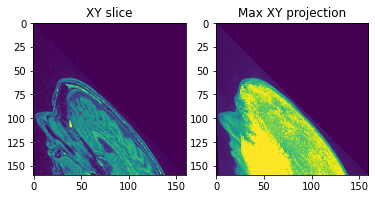

Angle:  30


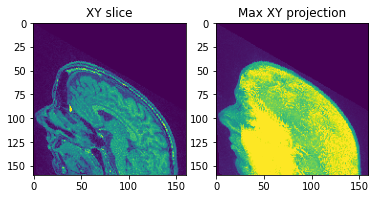

Angle:  0


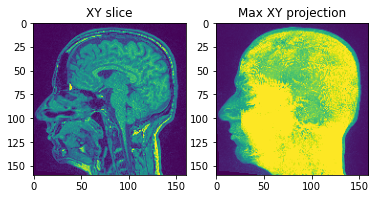

Angle:  -30


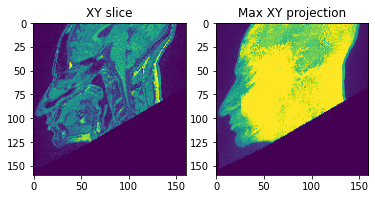

Angle:  -45


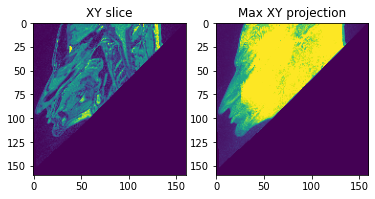

Angle:  -60


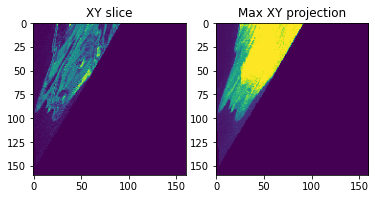

In [5]:
for shear_angle in [60, 45, 30, 0, -30, -45, -60]:
    
    print("Angle: ",shear_angle)

    # transform the image
    transform = cle.AffineTransform3D()
    transform.shear_in_z_plane(angle_y_in_degrees=shear_angle)
    transformed_image = cle.affine_transform(input_image, transform=transform)
    
    # show resut
    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(transformed_image[64])
    ax1.set_title("XY slice")
    ax2.imshow(cle.maximum_z_projection(transformed_image))
    ax2.set_title("Max XY projection")
    plt.show()

## Shearing along X in the Z plane
We can also shear along X in the Z-plane:

Angle:  60


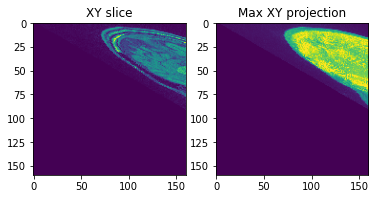

Angle:  45


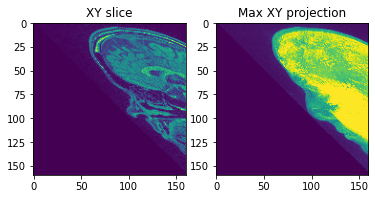

Angle:  30


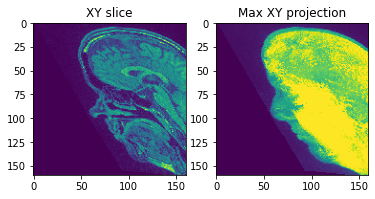

Angle:  0


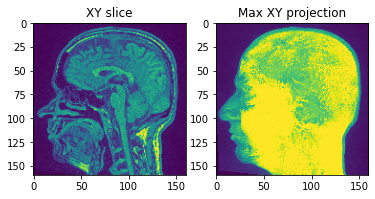

Angle:  -30


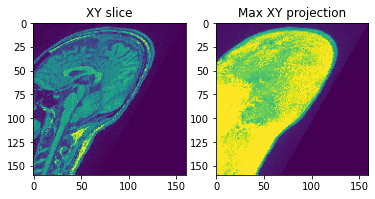

Angle:  -45


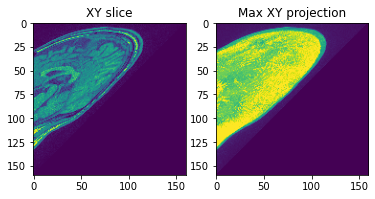

Angle:  -60


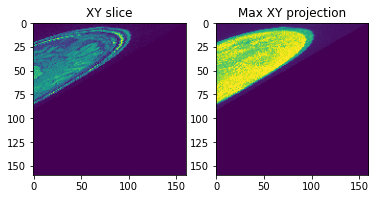

In [6]:
for shear_angle in [60, 45, 30, 0, -30, -45, -60]:
    
    print("Angle: ",shear_angle)

    # transform the image
    transform = cle.AffineTransform3D()
    transform.shear_in_z_plane(angle_x_in_degrees=shear_angle)
    transformed_image = cle.affine_transform(input_image, transform=transform)
    
    # show resut
    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(transformed_image[60])
    ax1.set_title("XY slice")
    ax2.imshow(cle.maximum_z_projection(transformed_image))
    ax2.set_title("Max XY projection")
    plt.show()

## The Y-plane
We now take a look at the Y-plane, also known as the XZ-plane, and a maximum intensity projection along Y. X goes from left to the right in these images and Z from top to bottom.

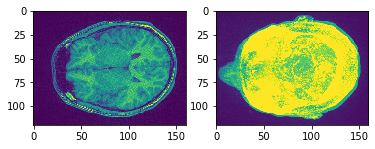

In [7]:
fig, (ax1,ax2) = plt.subplots(1, 2)

cle.imshow(input_image[:,60], plot=ax1)
cle.imshow(cle.maximum_y_projection(input_image), plot=ax2)

## Shearing along X in the Y-plane

Angle:  60


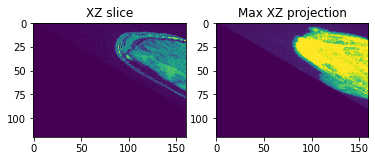

Angle:  45


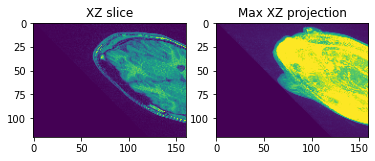

Angle:  30


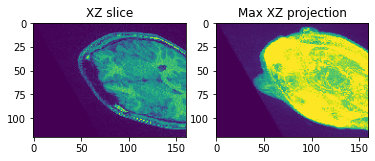

Angle:  0


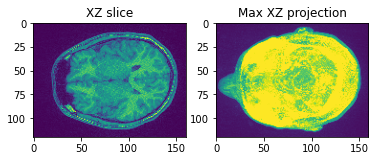

Angle:  -30


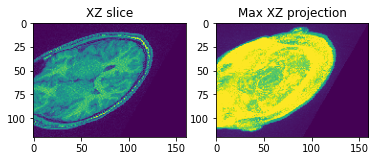

Angle:  -45


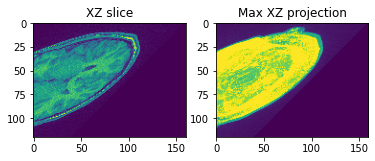

Angle:  -60


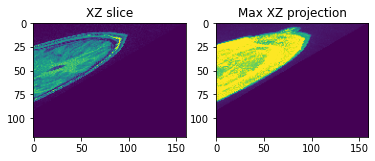

In [8]:
for shear_angle in [60, 45, 30, 0, -30, -45, -60]:
    
    print("Angle: ",shear_angle)

    # transform the image
    transform = cle.AffineTransform3D()
    transform.shear_in_y_plane(angle_x_in_degrees=shear_angle)
    transformed_image = cle.affine_transform(input_image, transform=transform)
    
    # show resut
    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(cle.pull(transformed_image)[:,60])
    ax1.set_title("XZ slice")
    ax2.imshow(cle.maximum_y_projection(transformed_image))
    ax2.set_title("Max XZ projection")
    plt.show()

# Shearing along Z in the Y-plane

Angle:  60


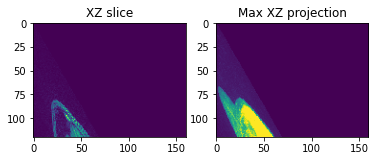

Angle:  45


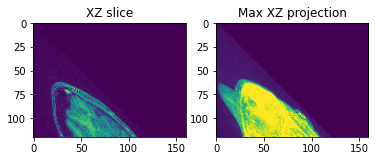

Angle:  30


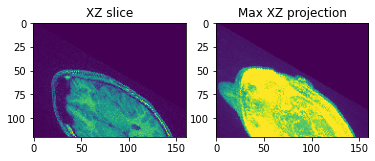

Angle:  0


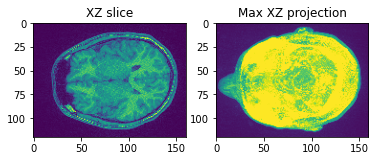

Angle:  -30


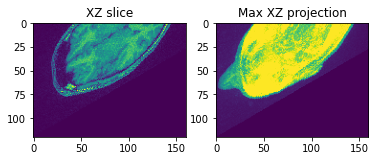

Angle:  -45


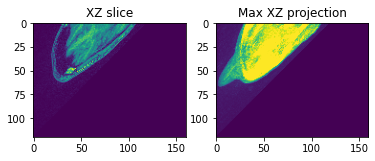

Angle:  -60


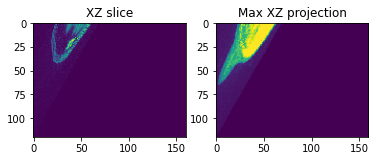

In [9]:
for shear_angle in [60, 45, 30, 0, -30, -45, -60]:
    
    print("Angle: ",shear_angle)

    # transform the image
    transform = cle.AffineTransform3D()
    transform.shear_in_y_plane(angle_z_in_degrees=shear_angle)
    transformed_image = cle.affine_transform(input_image, transform=transform)
    
    # show resut
    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(cle.pull(transformed_image)[:,60])
    ax1.set_title("XZ slice")
    ax2.imshow(cle.maximum_y_projection(transformed_image))
    ax2.set_title("Max XZ projection")
    plt.show()

## The X-plane
We now take a look at the X-plane, also known as the ZY-plane, and a maximum intensity projection along X. Y goes from top to the bottom in these images and Z goes from left to right.

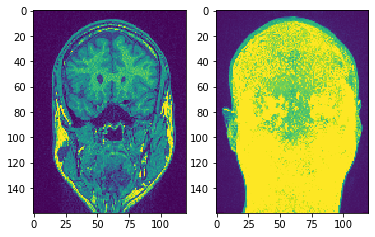

In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2)

cle.imshow(cle.transpose_xy(input_image[:,:,64]), plot=ax1)
cle.imshow(cle.maximum_x_projection(input_image), plot=ax2)

## Shearing along Y in the X-plane

Angle:  60


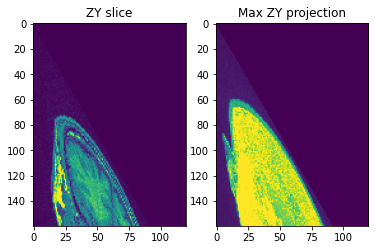

Angle:  45


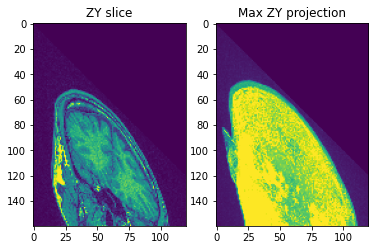

Angle:  30


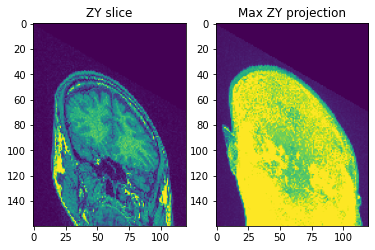

Angle:  0


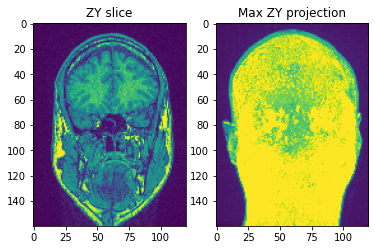

Angle:  -30


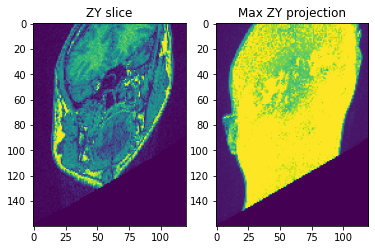

Angle:  -45


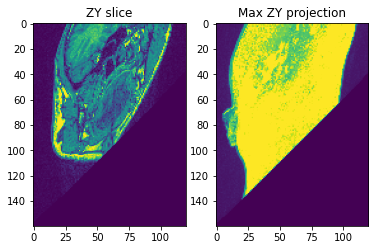

Angle:  -60


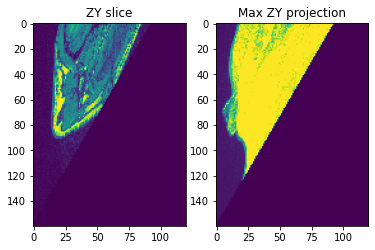

In [11]:
for shear_angle in [60, 45, 30, 0, -30, -45, -60]:
    
    print("Angle: ",shear_angle)

    # transform the image
    transform = cle.AffineTransform3D()
    transform.shear_in_x_plane(angle_y_in_degrees=shear_angle)
    transformed_image = cle.affine_transform(input_image, transform=transform)
    
    # show resut
    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(cle.transpose_xy(cle.pull(transformed_image)[:,:,60]))
    ax1.set_title("ZY slice")
    ax2.imshow(cle.maximum_x_projection(transformed_image))
    ax2.set_title("Max ZY projection")
    plt.show()

## Shearing along Z in the X-plane

Angle:  60


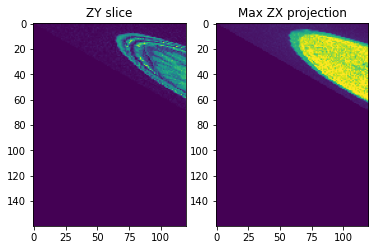

Angle:  45


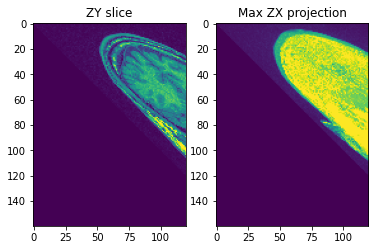

Angle:  30


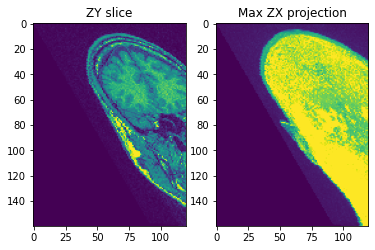

Angle:  0


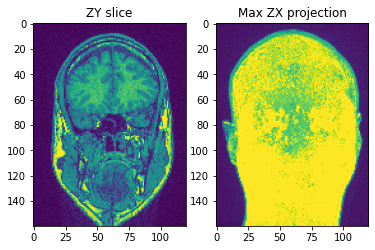

Angle:  -30


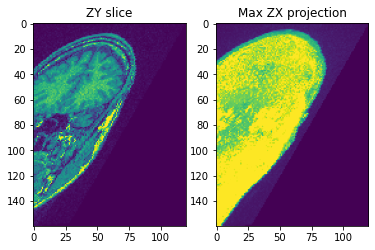

Angle:  -45


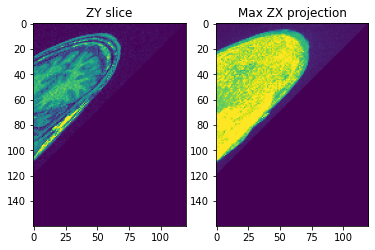

Angle:  -60


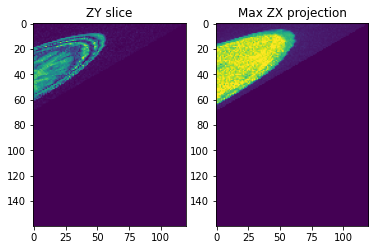

In [12]:
for shear_angle in [60, 45, 30, 0, -30, -45, -60]:
    
    print("Angle: ",shear_angle)

    # transform the image
    transform = cle.AffineTransform3D()
    transform.shear_in_x_plane(angle_z_in_degrees=shear_angle)
    transformed_image = cle.affine_transform(input_image, transform=transform)
    
    # show resut
    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(cle.transpose_xy(cle.pull(transformed_image)[:,:,60]))
    ax1.set_title("ZY slice")
    ax2.imshow(cle.maximum_x_projection(transformed_image))
    ax2.set_title("Max ZX projection")
    plt.show()